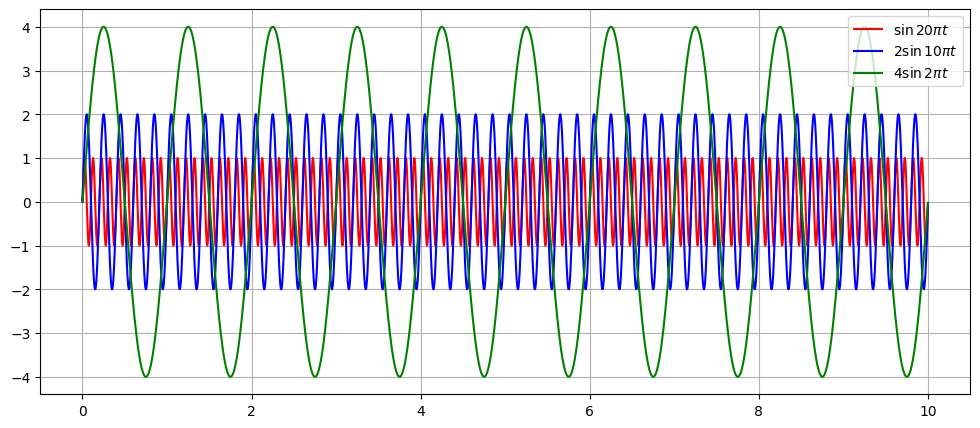

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

time = np.arange(0, 10, 0.001)
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)

plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='green')

plt.legend(); plt.grid(); plt.show


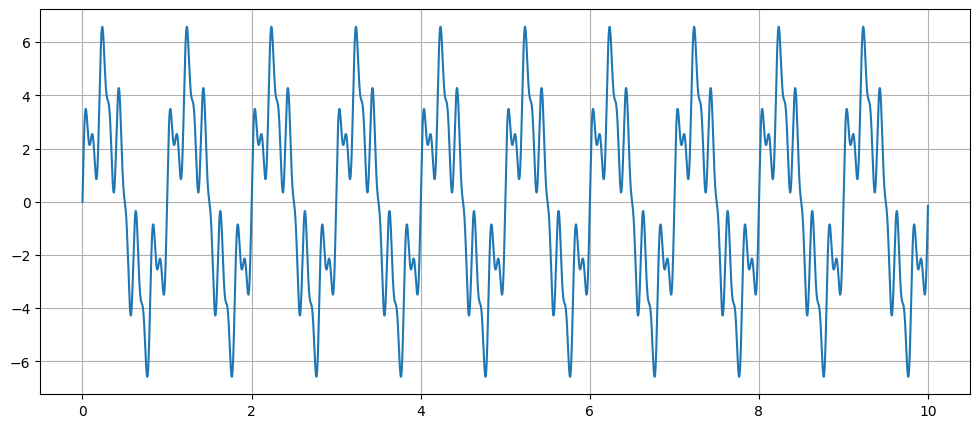

In [2]:
sin_sum = sin1 + sin2 + sin3
plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

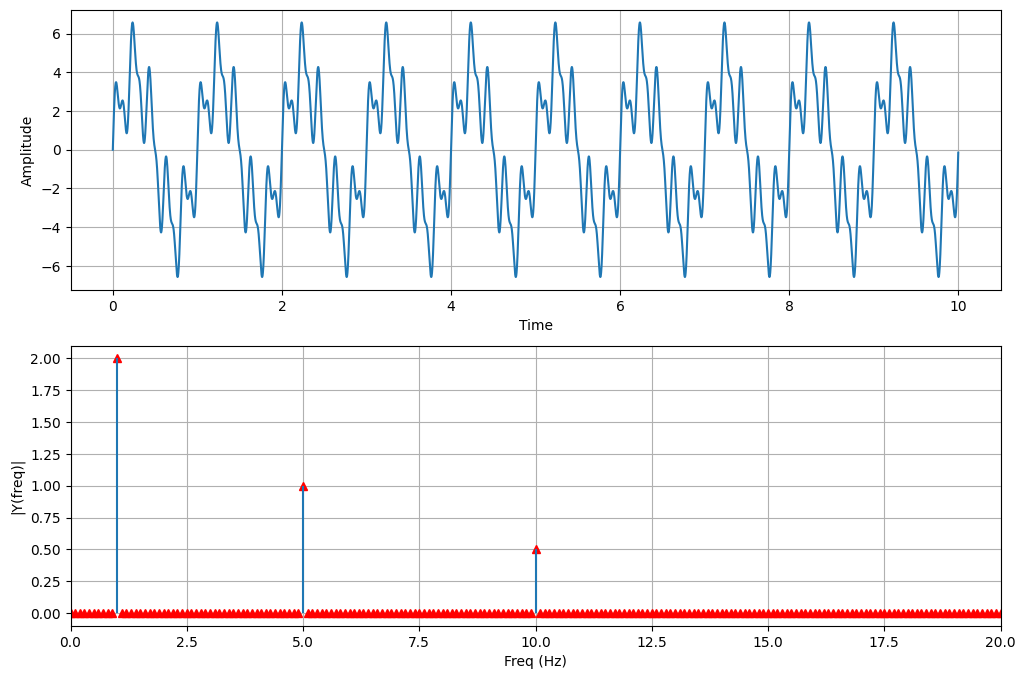

In [14]:
n = len(sin_sum)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]


Y = np.fft.fft(sin_sum)/n
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

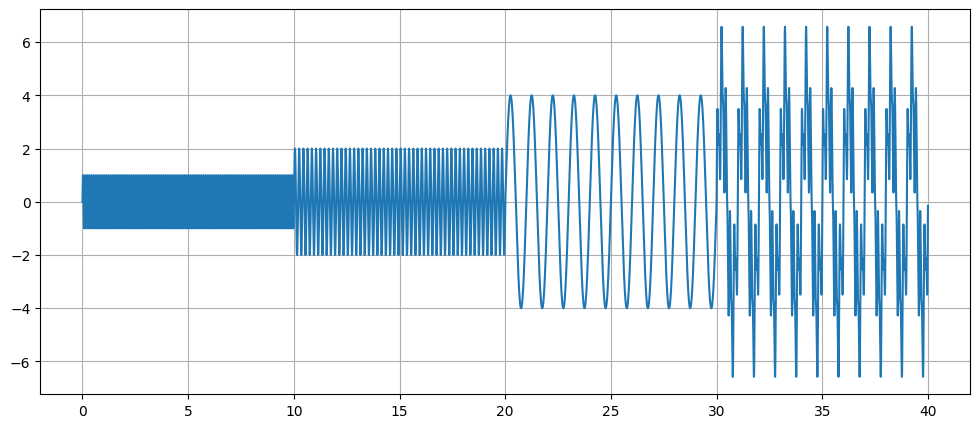

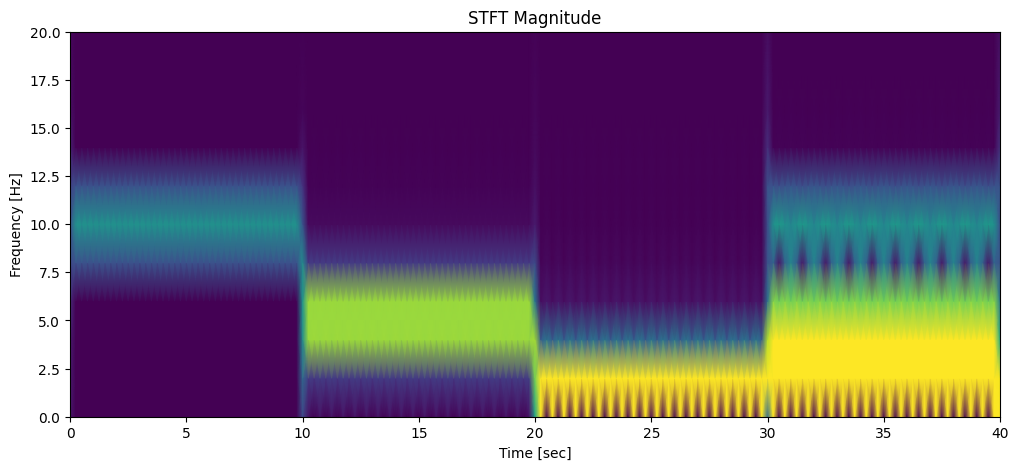

In [15]:
from scipy import signal

sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))

time = np.arange(0, 40, 0.001)
plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()

def calc_stft(nperseg):
    f, t, Zxx = signal.stft(sin_concat, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

calc_stft(500)

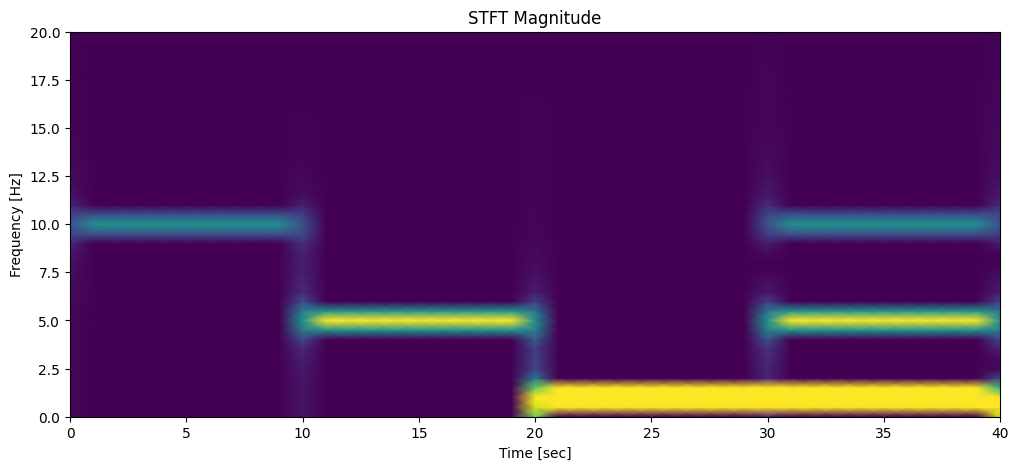

In [16]:
calc_stft(2000)

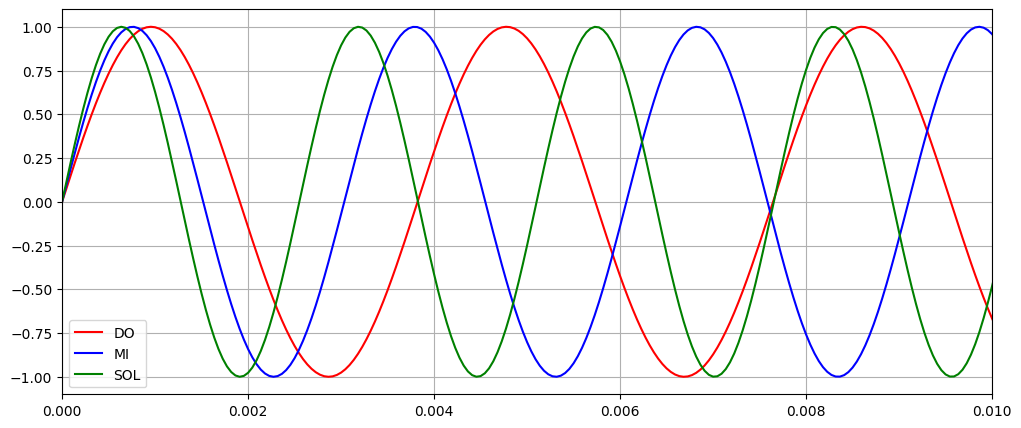

In [27]:
import librosa.display, librosa
import IPython.display
import warnings
import numpy as np
warnings.simplefilter("ignore")

def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

sr = 22*1000.
ts = 1/sr
time = np.arange(0, 1, ts)
DO = sin_wave(1, 261.6256, time)
MI = sin_wave(1, 329.6276, time)
SOL = sin_wave(1, 391.9954, time)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(time, DO, label="DO", color='red')
plt.plot(time, MI, label="MI", color='blue')
plt.plot(time, SOL, label="SOL", color='green')
plt.xlim((0, 0.01))
plt.legend(); plt.grid(); plt.show()

IPython.display.Audio(data=DO, rate=sr)